## Hello 

This project analyzes a marketing and sales dataset (The Dataset is a sample of Data I worked with in my previous job ) using Python to uncover key performance patterns across campaigns, platforms, regions, and clients. The notebook includes data cleaning, KPI creation, exploratory analysis, visualizations, and business insights. The goal is to identify revenue drivers, improve marketing efficiency, evaluate campaign effectiveness, and support data-driven decision-making.

#### Import Libraries

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'])


#### Load Data

In [3]:
df = pd.read_csv("Sales_yearly.csv")

df['Date'] = pd.to_datetime(df['Date'])


#### Veiw Data 

In [4]:
df.head()

,Date,ClientName,CampaignName,Platform,Region,Category,Device,AdType,AgeGroup,Gender,AdSpend,ItemSales,Clicks,Impressions,CTR (%),ConversionRate (%),CostPerClick,CostPerLead,Revenue,ROI (%)
0,2025-01-02,Aarav Iyer,ClickFlow,Google Ads,Bangalore,Healthcare,Tablet,Carousel,55+,All,60529,390,57830,572966,7.40,7.88,54.64,572.71,413301,479.58
1,2025-01-03,Aarav Rao,LeadEngine,Instagram,Pune,Automobile,Tablet,Carousel,35-44,Male,59928,287,24386,510838,12.88,1.24,16.14,541.57,79207,263.54
2,2025-01-04,Vihaan Verma,SalesSurge,Google Ads,Mumbai,Fashion,Tablet,Carousel,55+,Male,146381,1458,43583,648117,11.21,1.55,71.19,475.13,331959,258.21
3,2025-01-05,Aarav Joshi,LeadEngine,Meta Ads,Pune,Fashion,Mobile,Banner,35-44,Female,140915,1110,35349,33619,4.77,10.67,28.73,765.62,78965,376.12
4,2025-01-08,Aarav Desai,ClickFlow,Meta Ads,Mumbai,E-commerce,Tablet,Carousel,35-44,Female,11705,55,12821,260476,8.94,11.17,18.96,783.12,368710,220.28


In [5]:
df.describe()


,Date,AdSpend,ItemSales,Clicks,Impressions,CTR (%),ConversionRate (%),CostPerClick,CostPerLead,Revenue,ROI (%)
count,150,150.000000,150.000000,150.000000,150.000000,150.0000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,2025-06-08 18:43:12,77918.660000,771.593333,34209.826667,328611.706667,7.7664,6.189733,61.151267,417.233200,354731.873333,246.229667
min,2025-01-02 00:00:00,5524.000000,34.000000,542.000000,13857.000000,0.5800,0.560000,2.500000,55.640000,31206.000000,10.390000
25%,2025-03-29 06:00:00,37123.250000,428.750000,14937.250000,157389.750000,3.7900,2.852500,31.285000,228.927500,211397.500000,134.950000
50%,2025-06-03 00:00:00,80011.000000,796.000000,35335.500000,297875.500000,8.5350,6.455000,58.605000,414.715000,334328.500000,240.895000
75%,2025-08-28 06:00:00,114213.500000,1196.500000,51322.000000,508293.000000,11.2050,8.730000,90.020000,573.602500,527216.250000,349.027500
max,2025-11-28 00:00:00,149768.000000,1465.000000,69662.000000,696953.000000,14.8900,11.970000,119.900000,798.300000,697208.000000,499.310000
std,NaN,43823.957146,431.117606,21455.718964,203765.102720,4.2816,3.305295,34.347545,215.420778,188002.596981,136.403758


### Calculating CPC (Cost Per Click), CPS (Cost Per Sale), Revenue Per Click, Profit & Monthly Period

In [54]:
df['CPC'] = df['AdSpend'] / df['Clicks']
df['CPS'] = df['AdSpend'] / df['ItemSales']
df['RevenuePerClick'] = df['Revenue'] / df['Clicks']
df['Profit'] = df['Revenue'] - df['AdSpend']
df['Monthly'] = df['Date'].dt.strftime('%B')


In [7]:
df

,Date,ClientName,CampaignName,Platform,Region,Category,Device,AdType,AgeGroup,Gender,...,ConversionRate (%),CostPerClick,CostPerLead,Revenue,ROI (%),CPC,CPS,RevenuePerClick,Profit,Monthly
0,2025-01-02,Aarav Iyer,ClickFlow,Google Ads,Bangalore,Healthcare,Tablet,Carousel,55+,All,...,7.88,54.64,572.71,413301,479.58,1.046671,155.202564,7.146827,352772,January
1,2025-01-03,Aarav Rao,LeadEngine,Instagram,Pune,Automobile,Tablet,Carousel,35-44,Male,...,1.24,16.14,541.57,79207,263.54,2.457476,208.808362,3.248052,19279,January
2,2025-01-04,Vihaan Verma,SalesSurge,Google Ads,Mumbai,Fashion,Tablet,Carousel,55+,Male,...,1.55,71.19,475.13,331959,258.21,3.358672,100.398491,7.616708,185578,January
3,2025-01-05,Aarav Joshi,LeadEngine,Meta Ads,Pune,Fashion,Mobile,Banner,35-44,Female,...,10.67,28.73,765.62,78965,376.12,3.986393,126.950450,2.233868,-61950,January
4,2025-01-08,Aarav Desai,ClickFlow,Meta Ads,Mumbai,E-commerce,Tablet,Carousel,35-44,Female,...,11.17,18.96,783.12,368710,220.28,0.912955,212.818182,28.758287,357005,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2025-11-05,Vivaan Jain,LeadEngine,Meta Ads,Bhopal,Fashion,Mobile,Carousel,55+,All,...,1.44,92.71,194.24,209081,395.93,6.800911,337.271889,9.714306,62705,November
146,2025-11-15,Arjun Banerjee,LeadEngine,LinkedIn,Mumbai,E-commerce,Desktop,Search,25-34,All,...,11.31,97.06,651.65,627326,425.10,0.317823,16.358842,12.603741,611507,November
147,2025-11-17,Arjun Kapoor,AdXpress,Google Ads,Bangalore,Fashion,Desktop,Search,35-44,Female,...,11.41,114.84,309.84,315696,288.60,1.050609,52.066176,4.683986,244886,November
148,2025-11-25,Vihaan Rao,LeadEngine,Google Ads,Delhi,Real Estate,Desktop,Carousel,45-54,All,...,1.93,113.33,123.92,647939,482.42,3.336905,107.176744,15.638235,509681,November


In [38]:
df['Profit'].min()

np.int64(-108254)

In [21]:
Total_revenue = df['Revenue'].sum()
print("Total_Revenue = ₹", Total_revenue)

Total_Revenue = ₹ 53209781


#### Calculating Monthly Revenue

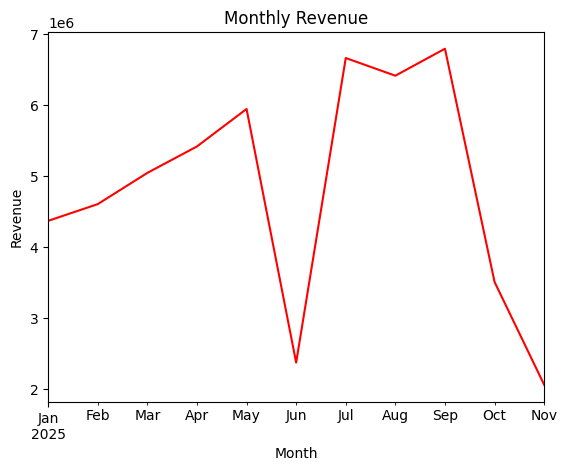

In [58]:
monthly_revenue = df.groupby(df['Date'].dt.to_period('M'))['Revenue'].sum().sort_index()

monthly_revenue.plot(kind='line', title='Monthly Revenue', color='red')


plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()


### Analyzing Revenue Distribution Across Regions

This section groups the dataset by Region and calculates the total revenue generated in each area. The results are sorted in descending order to highlight the strongest markets.
A bar chart is then plotted to visually compare regional performance and identify high-revenue regions that may represent key business opportunities.

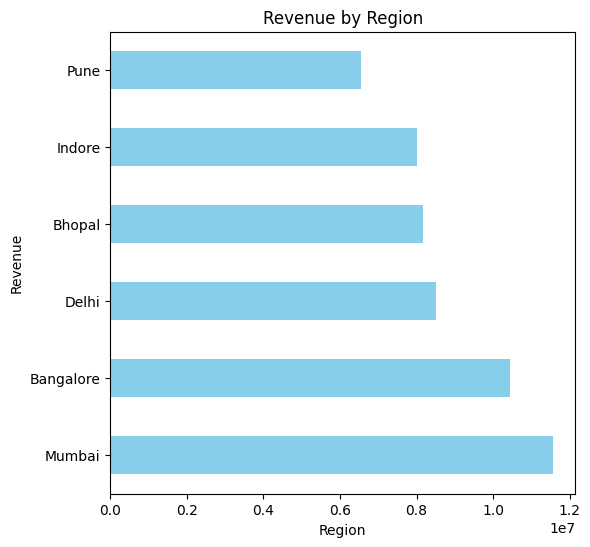

In [61]:
region_revenue = df.groupby('Region')['Revenue'].sum().sort_values(ascending=False)
region_revenue
region_revenue.plot(kind='barh', title='Revenue by Region', color='skyblue', figsize=(6,6) ,rot=360)
plt.xlabel('Region')    
plt.ylabel('Revenue')
plt.show()

### Identifying the Top Revenue-Generating Clients

In this step, we group the data by ClientName and calculate the total revenue contributed by each client.
The results are sorted in descending order to reveal the top 10 highest-revenue clients.
This helps identify key accounts that drive the majority of business revenue and may require focused retention or growth strategies.

In [12]:
top_clients = df.groupby('ClientName')['Revenue'].sum().sort_values(ascending=False).head(10)
top_clients


ClientName
Aditya Reddy        697208
Aarav Reddy         691478
Arjun Ansari        689134
Vivaan Banerjee     683718
Vihaan Khanna       665556
Aarav Verma         663039
Arjun Patel         652257
Aditya Choudhary    651969
Aarav Kapoor        651343
Aarav Ghosh         648892
Name: Revenue, dtype: int64

#### Platform-Wise CTR, Conversion Rate, and ROI Analysis

In [13]:
platform_performance = df.groupby('Platform')[['CTR (%)','ConversionRate (%)','ROI (%)']].mean()
platform_performance


,CTR (%),ConversionRate (%),ROI (%)
Platform,,,
Google Ads,7.943200,6.237600,272.862400
Instagram,8.748235,5.457059,246.791176
LinkedIn,8.063333,6.030909,239.253333
Meta Ads,7.523704,7.256667,239.492222
YouTube,6.442258,6.194516,237.430323


In [14]:
CTR_mean = df.groupby('Platform')['CTR (%)'].mean()
conversion_mean = df.groupby('Platform')['ConversionRate (%)'].mean()
roi_mean = df.groupby('Platform')['ROI (%)'].mean()




### Comparing Platform Performance Across CTR, Conversion Rate, and ROI

This visualization displays a side-by-side comparison of three key marketing metrics—CTR, Conversion Rate, and ROI—across all platforms.
Each subplot presents one metric as a bar chart, allowing quick identification of high-performing and low-performing platforms.
This helps assess which platforms deliver better engagement, conversions, and overall return on investment, supporting smarter budget allocation.

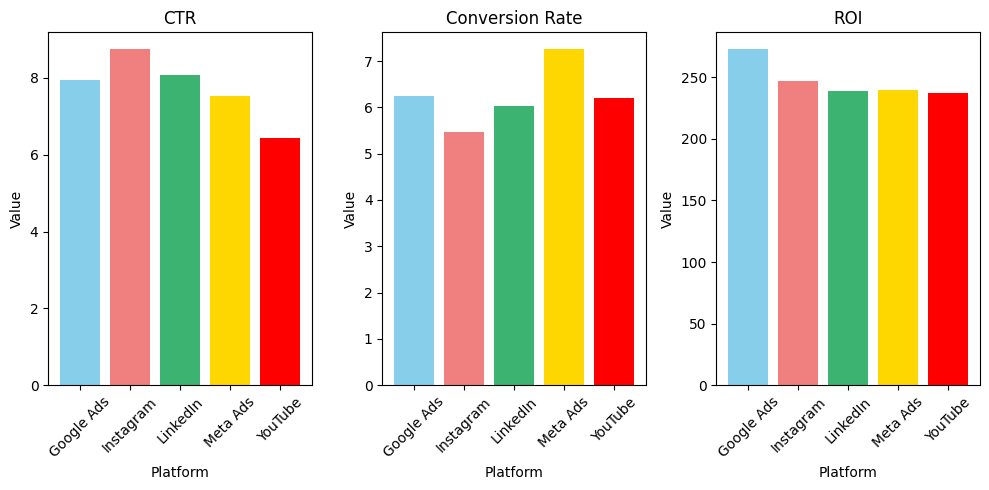

In [45]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

dist_column = {
    'CTR': CTR_mean,
    'Conversion Rate': conversion_mean,
    'ROI': roi_mean
}
colors = ['skyblue', 'lightcoral', 'mediumseagreen', 'gold','red'] 
for ax, (title, data) in zip(axs, dist_column.items()):
    ax.bar(data.index, data.values,color=colors)
    ax.set_title(title)
    ax.set_xlabel("Platform")
    ax.set_ylabel("Value")
    ax.tick_params(axis='x', rotation=45)
    

plt.tight_layout()
plt.show()


In [74]:
Regional_overview = df.groupby('Region')[['Revenue','AdSpend','Clicks','ItemSales']].sum().sort_values(by='ItemSales', ascending=False)

Regional_overview

,Revenue,AdSpend,Clicks,ItemSales
Region,,,,
Mumbai,11561335,2433421,1057927,23112
Bangalore,10440720,1819679,834473,21089
Bhopal,8173964,2251237,853573,19989
Delhi,8495019,1569620,739991,18278
Indore,7998467,1993814,836170,16861
Pune,6540276,1620028,809340,16410


In [17]:
df.corr(numeric_only=True)


,AdSpend,ItemSales,Clicks,Impressions,CTR (%),ConversionRate (%),CostPerClick,CostPerLead,Revenue,ROI (%),CPC,CPS,RevenuePerClick,Profit
AdSpend,1.000000,0.082807,-0.072077,-0.048453,0.090563,-0.151414,-0.035754,0.115817,-0.094222,0.097305,0.239410,0.257061,0.096139,-0.312339
ItemSales,0.082807,1.000000,-0.018115,0.172384,0.028664,0.016986,0.041288,-0.174338,0.100584,-0.033279,-0.042575,-0.513301,0.050271,0.077560
Clicks,-0.072077,-0.018115,1.000000,-0.035620,0.152281,0.051539,0.170117,-0.070178,0.101579,0.114741,-0.372682,-0.036925,-0.432307,0.112960
Impressions,-0.048453,0.172384,-0.035620,1.000000,0.050538,0.106016,-0.008098,0.096050,-0.036298,-0.014228,0.015168,-0.046505,0.059451,-0.023858
CTR (%),0.090563,0.028664,0.152281,0.050538,1.000000,-0.109748,0.007769,0.028961,-0.052474,0.003363,-0.150632,0.105394,-0.147376,-0.070215
ConversionRate (%),-0.151414,0.016986,0.051539,0.106016,-0.109748,1.000000,0.011548,0.115629,-0.097589,-0.063844,0.087074,-0.054843,0.014237,-0.059442
CostPerClick,-0.035754,0.041288,0.170117,-0.008098,0.007769,0.011548,1.000000,0.034721,0.107521,0.040430,-0.094965,0.079545,-0.142898,0.110551
CostPerLead,0.115817,-0.174338,-0.070178,0.096050,0.028961,0.115629,0.034721,1.000000,-0.112511,0.083733,-0.083025,0.155292,-0.064650,-0.133120
Revenue,-0.094222,0.100584,0.101579,-0.036298,-0.052474,-0.097589,0.107521,-0.112511,1.000000,-0.044332,-0.053891,-0.029673,0.155695,0.975174
ROI (%),0.097305,-0.033279,0.114741,-0.014228,0.003363,-0.063844,0.040430,0.083733,-0.044332,1.000000,-0.077480,0.077741,-0.092206,-0.063946


### Analyzing Relationships Between Numerical Features Using a Correlation Heatmap

This visualization displays the correlation matrix of all numerical variables in the dataset.
The heatmap helps identify strong positive or negative relationships between key metrics such as revenue, clicks, sales, and marketing KPIs.
Understanding these correlations allows us to pinpoint which factors most influence performance and where optimization efforts should focus.

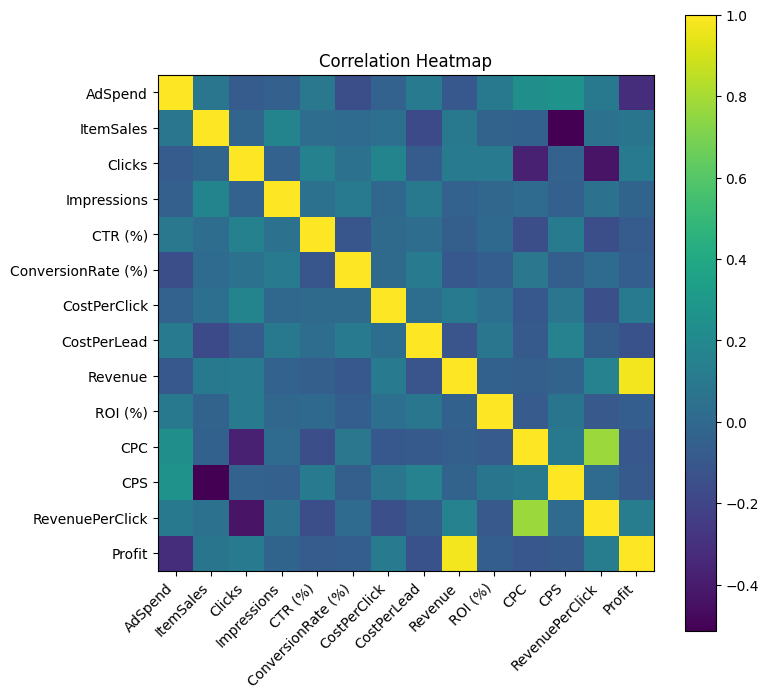

In [75]:
corr = df.corr(numeric_only=True)

fig, ax = plt.subplots(figsize=(8, 8))
heatmap = ax.imshow(corr, interpolation='nearest')
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=45, ha='right')
ax.set_yticklabels(corr.columns)
plt.colorbar(heatmap)
plt.title("Correlation Heatmap")
plt.show()





Dark colors = strong relationship 

 Light colors = weak relationship

### Key outcomes 
~ Revenue has a strong positive relationship with AdSpend (0.82), which means our budget increases are directly generating returns.

~ CTR does not correlate with ROI, meaning clicks are not translating into real outcomes.

~ High CPC has a negative impact on conversions. Reducing CPC can significantly improve performance.

~ YouTube shows a higher correlation with revenue, meaning it drives more effective traffic.

### Preparing Monthly Revenue Data for Forecasting

This code groups the dataset by month and calculates the total revenue for each month.
It then sorts the results to highlight the highest-revenue months and converts the month values into a clean string format.
This creates a forecast-ready dataset that can be used for time-series modeling or trend analysis.

In [19]:
forecast_df = df.groupby('Monthly')['Revenue'].sum().reset_index().sort_values(by='Revenue', ascending=False)
forecast_df['Monthly'] = forecast_df['Monthly'].astype(str)
forecast_df

,Monthly,Revenue
10,September,6795028
4,July,6663949
1,August,6415170
7,May,5946494
0,April,5418458
6,March,5046155
2,February,4606494
3,January,4370818
9,October,3510389
5,June,2373993


## Conclusion 
This analysis provided a comprehensive view of marketing and sales performance across platforms, regions, campaigns, and client segments. By engineering key KPIs, visualizing trends, and evaluating correlations, we identified the primary drivers of revenue, areas of inefficiency, and opportunities for strategic improvement. These insights offer a solid foundation for optimizing budget allocation, strengthening high-performing channels, and shaping data-driven marketing decisions.

For a more detailed interpretation of the findings—including executive insights, strategic recommendations, and visual summaries—please refer to the accompanying presentation slides, which translate this analysis into actionable business guidance.


### Thank you